In [358]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import matplotlib.pyplot as plt
import seaborn as sns

real_color = sns.color_palette("hls", 6)
empirical_color = sns.color_palette([(color[0]*0.6, color[1]*0.6, color[2]*0.6) for color in real_color])

In [359]:
m = 50
M = 5000
n = 6
uniform_sample = np.random.uniform(0,1,(m,n))
ordered_sample = np.sort(uniform_sample,axis = 1)

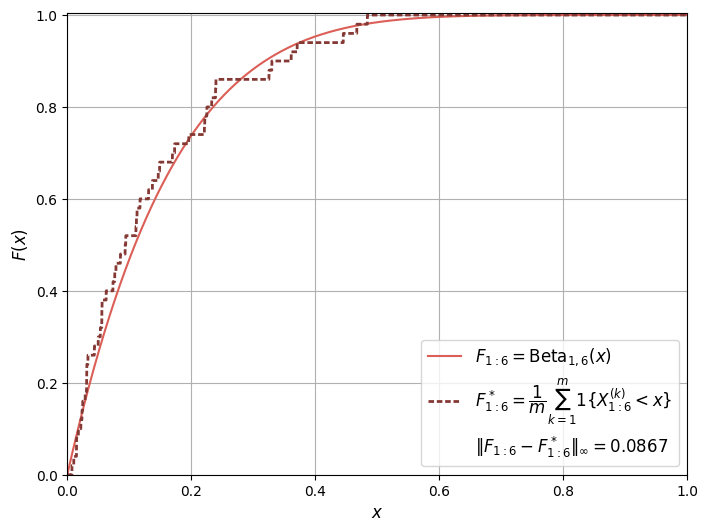

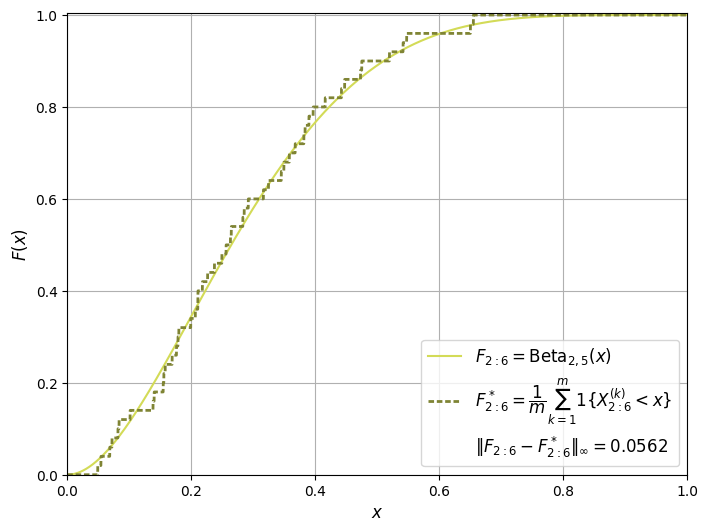

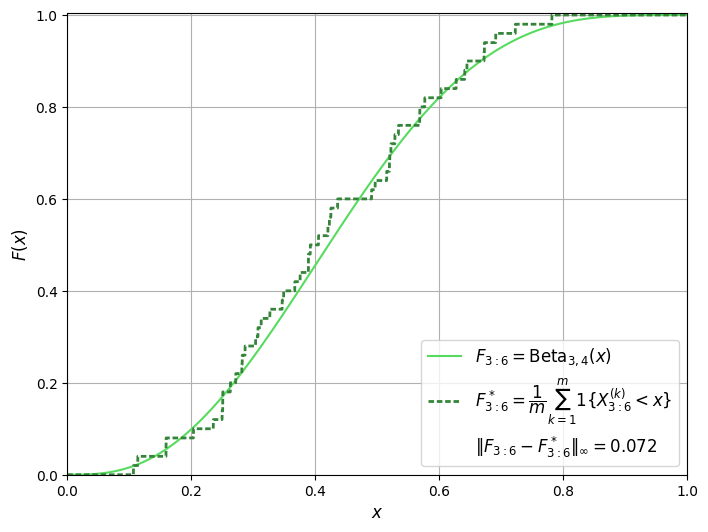

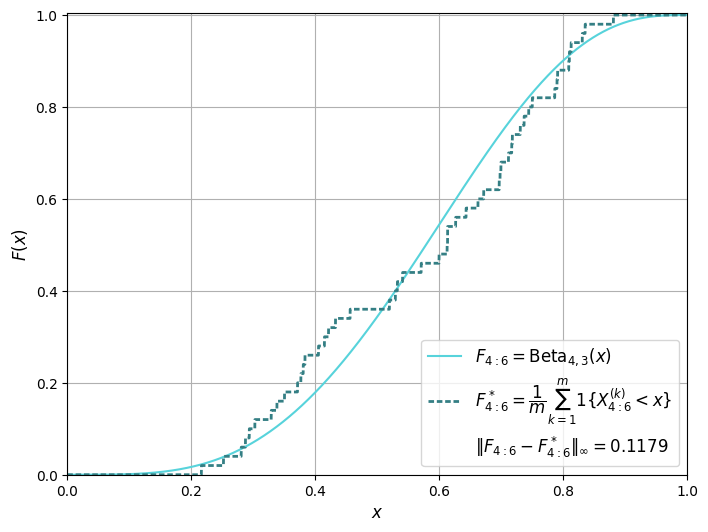

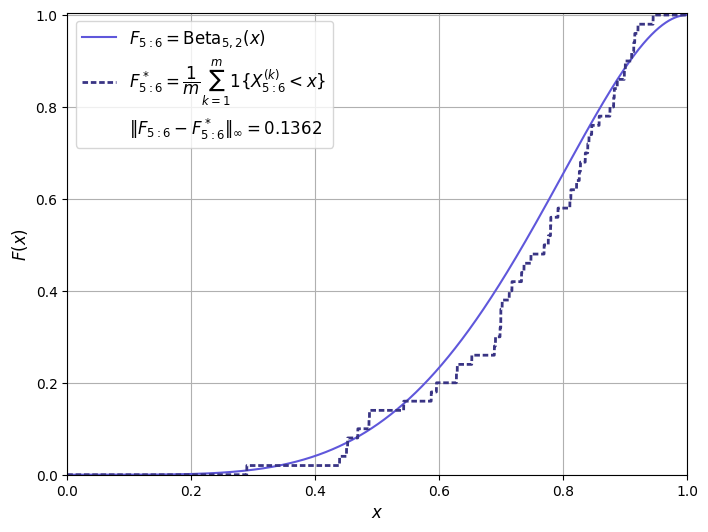

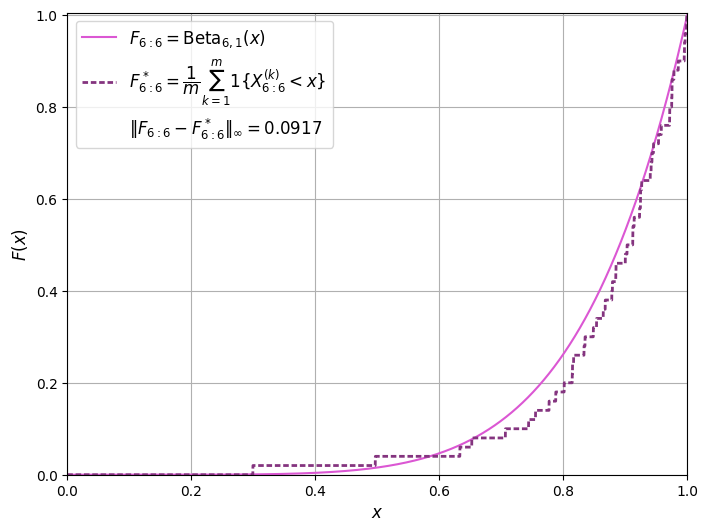

In [360]:
for i in range(n):
    x_values = np.linspace(0, 1, M)

    # Real distribution for x_values
    Fi = stats.beta.cdf(x_values, i+1, n-i)

    # Empirical distribution for x_values
    comparison_matrix = ordered_sample[:,i][np.newaxis, :] < x_values[:, np.newaxis] # Compare X_{i:n} < x_values
    Fi_empirical = (np.sum(comparison_matrix, axis = 1)/m)

    #Uniform distance
    unif_dist = np.max(np.abs(Fi-Fi_empirical))

    # Plotting details
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, Fi, color = real_color[i],
              label=rf'$F_{{{i+1}:{n}}} = \text{{Beta}}_{{ {i+1},{n-i} }}(x)$')
    plt.plot(x_values, Fi_empirical, color = empirical_color[i], linestyle='--', dashes=(2, 1), linewidth = 2,
              label=rf'$F^*_{{{i+1}:{n}}} = \dfrac{{1}}{{m}}\sum_{{k = 1}}^{{m}}1\{{X^{{(k)}}_{{{i+1}:{n}}} < x\}}$')
    plt.plot([], [], ' ', label=rf"$\|F_{{{i+1}:{n}}} - F^*_{{{i+1}:{n}}}\|_\infty = {round(unif_dist,4)}$")
    plt.xlabel('$x$', fontsize = 12)
    plt.ylabel('$F(x)$', fontsize = 12)
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1.005)
    if i < n-2:
        plt.legend(loc='lower right', fontsize = 12)
    else:
        plt.legend(loc='upper left', fontsize = 12)
    plt.savefig(f'unif_order_{i+1}:6.png')
    plt.show()


In [361]:
alpha, sigma = 1, 1
pareto_sample = (np.random.pareto(alpha, (m,n)) + 1) * sigma
ordered_sample = np.sort(pareto_sample,axis = 1)

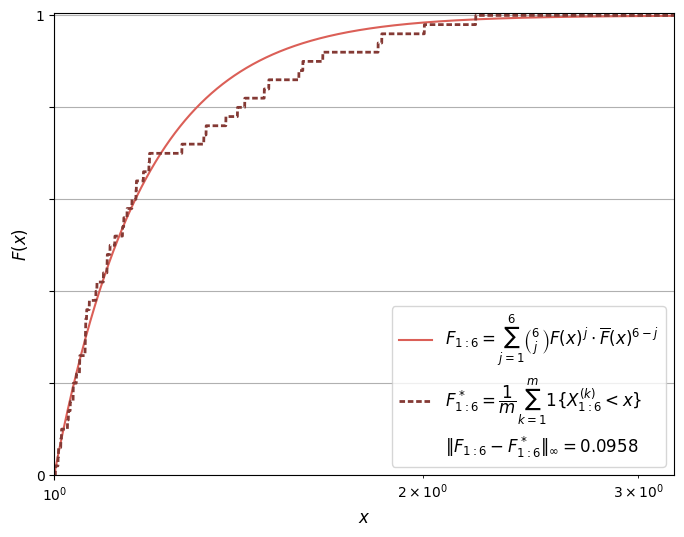

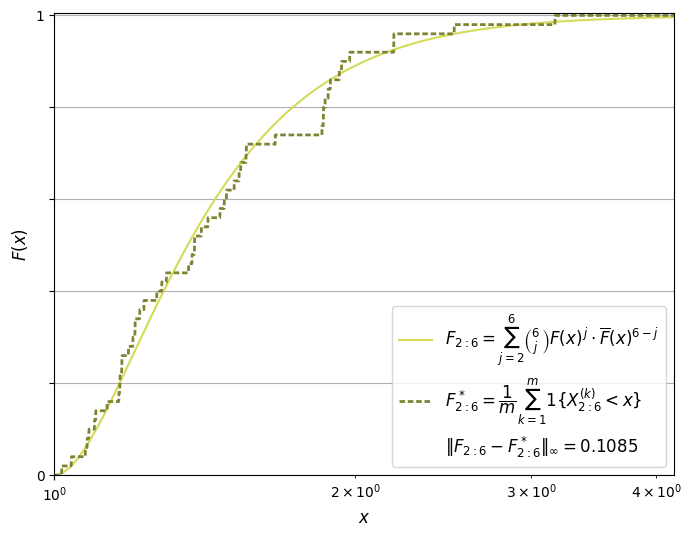

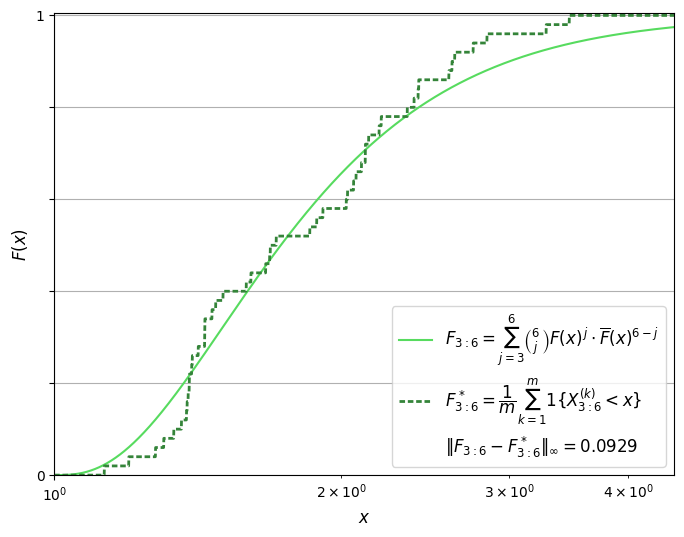

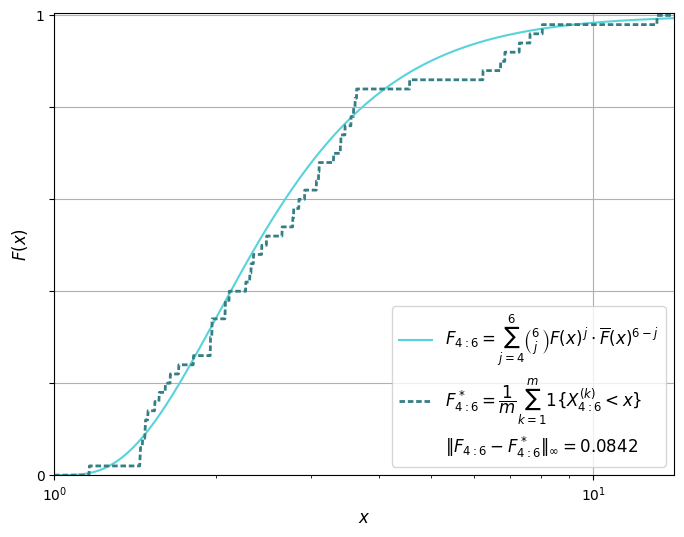

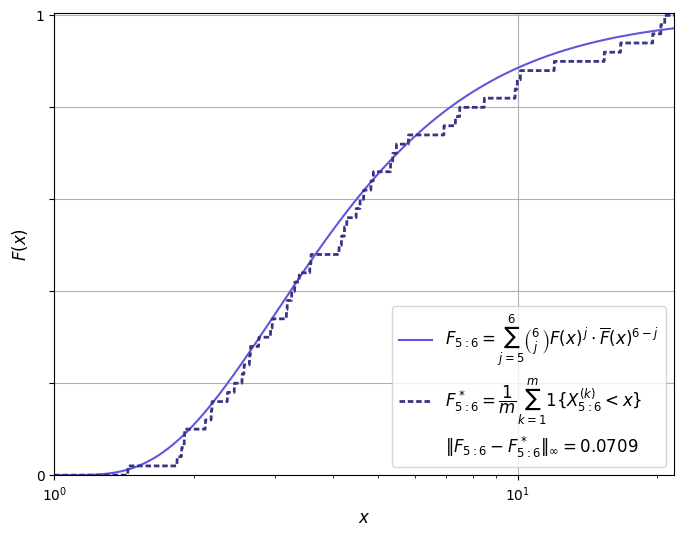

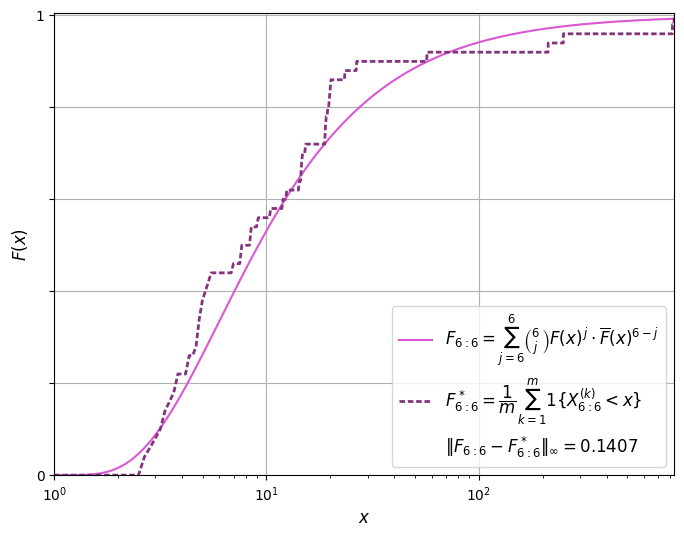

In [362]:
for i in range(n):
    x_values = np.linspace(1, np.max(ordered_sample[:,i]) + 1, M)

    # Real distribution for x_values
    Fi = np.sum(np.array([special.comb(n,j) *
          stats.pareto.cdf(x_values, b = 1)**(j) * 
          (1-stats.pareto.cdf(x_values, b = 1))**(n-j)
            for j in range(i+1,n+1)]), axis = 0)

    # Empirical distribution for x_values
    comparison_matrix = ordered_sample[:,i][np.newaxis, :] < x_values[:, np.newaxis] # Compare X_{i:n} < x_values
    Fi_empirical = (np.sum(comparison_matrix, axis = 1)/m)

    #Uniform distance
    unif_dist = np.max(np.abs(Fi-Fi_empirical))

    # Plotting details
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, Fi, color = real_color[i],
              label=rf'$F_{{{i+1}:{n}}} = \sum_{{j = {i+1}}}^{{{n}}} \binom{{{n}}}{{j}}  F(x)^{{\,j}} \cdot \overline{{F}}(x)^{{{n}-j}}$')
    plt.plot(x_values, Fi_empirical, color = empirical_color[i], linestyle='--', dashes=(2, 1), linewidth = 2,
              label=rf'$F^*_{{{i+1}:{n}}} = \dfrac{{1}}{{m}}\sum_{{k = 1}}^{{m}}1\{{X^{{(k)}}_{{{i+1}:{n}}} < x\}}$')
    plt.plot([], [], ' ', label=rf"$\|F_{{{i+1}:{n}}} - F^*_{{{i+1}:{n}}}\|_\infty = {round(unif_dist,4)}$")
    plt.xlabel('$x$', fontsize = 12)
    plt.ylabel('$F(x)$', fontsize = 12)
    plt.grid(True)
    plt.xlim(1, np.max(ordered_sample[:,i]) + 1)
    plt.ylim(0, 1.005)
    plt.xscale('log')
    plt.legend(loc='lower right', fontsize = 12)
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
    plt.savefig(f'pareto_order_{i+1}:6.png')
    plt.show()
